# **Recommendation System** (Make informed Decisions)

Importing the cleaned dataframe from the preprocessing notebook

In [ ]:
import pandas as pd

# Load the dataset to understand its structure and contents
file_path = '/content/drive/MyDrive/FDS project/Recommendations/final.csv'
df = pd.read_csv(file_path)
df = df.drop(df.columns[-2:], axis=1)
df.head()

,Brand Name,Total Section 1.1,Total Section 1.2,Total Section 1.3,Total Section 1.4,Total Section 1.5,Total Score Section 1,Total Section 2.1,Total Section 2.2,Total Section 2.3,...,Total Section 4.4B,Total Score Section 4,Total Section 5.1,Total Section 5.2,Total Section 5.3,Total Section 5.4,Total Section 5.5,Total Section 5.6,Total Score Section 5,TOTAL POINTS
0,Abercrombie & Fitch,3.5,7.25,7.5,3.0,0.0,21.25,1.0,2.0,0.0,...,2.0,9.0,2.0,1.0,3.0,2.0,0.0,2.0,10.0,83.25
1,Adidas,4.5,8.50,14.0,3.0,1.0,31.00,1.0,3.0,1.0,...,5.0,21.0,6.0,2.0,7.0,6.0,3.0,11.0,35.0,140.00
2,Aeropostale,0.5,3.50,1.5,0.0,0.0,5.50,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.50
3,AJIO,3.0,2.00,6.0,0.0,0.0,11.00,1.0,2.0,0.0,...,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,20.00
4,ALDI Nord,4.0,8.00,10.0,3.0,1.0,26.00,1.0,2.0,0.0,...,4.0,16.0,2.0,2.0,4.0,0.0,2.0,4.0,14.0,78.00


In [ ]:

def rename_duplicate_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [dup + ' a', dup + ' b']
    df.columns = cols
    return df

df_renamed = rename_duplicate_columns(df)

# Check the first few rows to confirm changes
df_renamed.head()


,Brand Name,Total Section 1.1,Total Section 1.2,Total Section 1.3,Total Section 1.4,Total Section 1.5,Total Score Section 1,Total Section 2.1,Total Section 2.2,Total Section 2.3,...,Total Section 4.4B,Total Score Section 4,Total Section 5.1,Total Section 5.2,Total Section 5.3,Total Section 5.4,Total Section 5.5,Total Section 5.6,Total Score Section 5,TOTAL POINTS
0,Abercrombie & Fitch,3.5,7.25,7.5,3.0,0.0,21.25,1.0,2.0,0.0,...,2.0,9.0,2.0,1.0,3.0,2.0,0.0,2.0,10.0,83.25
1,Adidas,4.5,8.50,14.0,3.0,1.0,31.00,1.0,3.0,1.0,...,5.0,21.0,6.0,2.0,7.0,6.0,3.0,11.0,35.0,140.00
2,Aeropostale,0.5,3.50,1.5,0.0,0.0,5.50,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.50
3,AJIO,3.0,2.00,6.0,0.0,0.0,11.00,1.0,2.0,0.0,...,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,20.00
4,ALDI Nord,4.0,8.00,10.0,3.0,1.0,26.00,1.0,2.0,0.0,...,4.0,16.0,2.0,2.0,4.0,0.0,2.0,4.0,14.0,78.00


# Metrics in Sustainability
Listed below are the metrics considered in our dataset. Use this as a guide to crosscheck what score based recommendation you want.

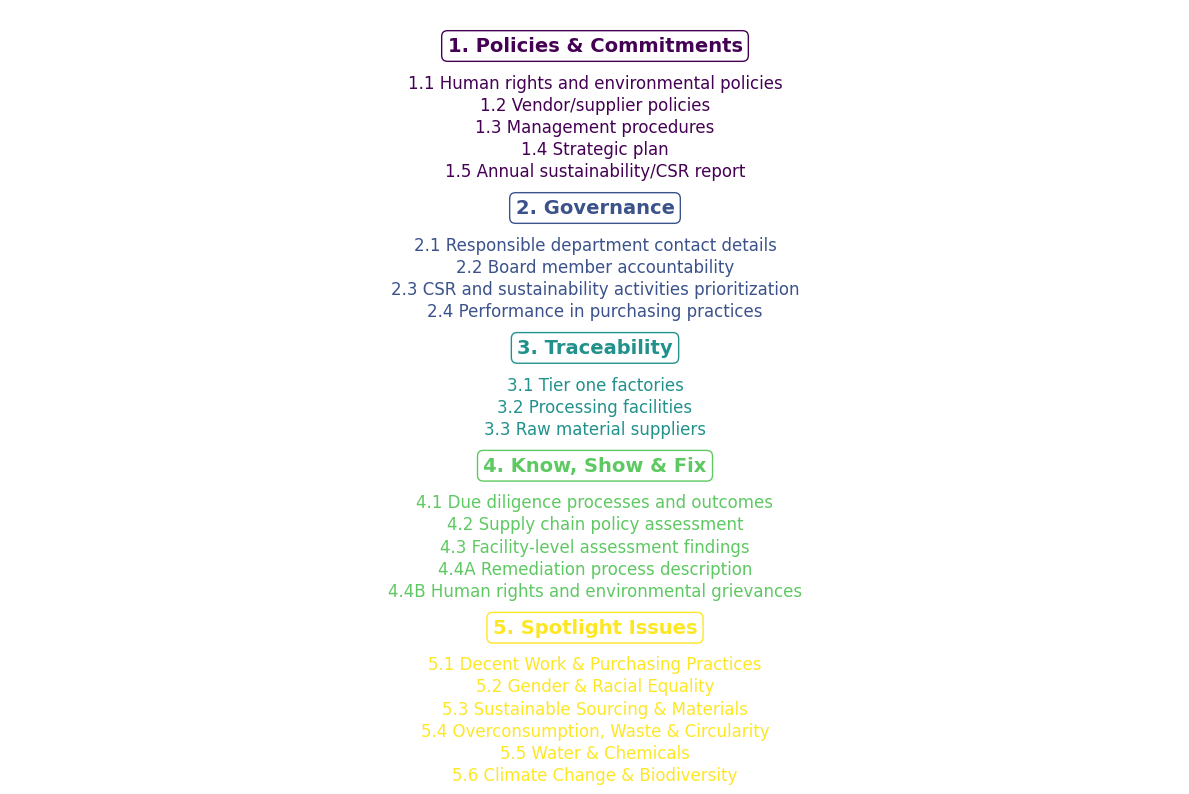

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Section titles and their respective metrics
sections = {
    "1. Policies & Commitments": ["1.1 Human rights and environmental policies",
                                  "1.2 Vendor/supplier policies",
                                  "1.3 Management procedures",
                                  "1.4 Strategic plan",
                                  "1.5 Annual sustainability/CSR report"],
    "2. Governance": ["2.1 Responsible department contact details",
                      "2.2 Board member accountability",
                      "2.3 CSR and sustainability activities prioritization",
                      "2.4 Performance in purchasing practices"],
    "3. Traceability": ["3.1 Tier one factories",
                        "3.2 Processing facilities",
                        "3.3 Raw material suppliers"],
    "4. Know, Show & Fix": ["4.1 Due diligence processes and outcomes",
                            "4.2 Supply chain policy assessment",
                            "4.3 Facility-level assessment findings",
                            "4.4A Remediation process description",
                            "4.4B Human rights and environmental grievances"],
    "5. Spotlight Issues": ["5.1 Decent Work & Purchasing Practices",
                            "5.2 Gender & Racial Equality",
                            "5.3 Sustainable Sourcing & Materials",
                            "5.4 Overconsumption, Waste & Circularity",
                            "5.5 Water & Chemicals",
                            "5.6 Climate Change & Biodiversity"]
}

# Colors for different sections
colors = plt.cm.viridis(np.linspace(0, 1, len(sections)))

fig, ax = plt.subplots(figsize=(12, 8))

# Starting Y position
y_pos = 0.95

for (section, metrics), color in zip(sections.items(), colors):
    # Section Title
    ax.text(0.5, y_pos, section, ha='center', va='center', fontsize=14, fontweight='bold', color=color, bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.3'))
    y_pos -= 0.05

    # Metrics
    for metric in metrics:
        ax.text(0.5, y_pos, metric, ha='center', va='center', fontsize=12, color=color)
        y_pos -= 0.03
    y_pos -= 0.02  # Additional space after each section

plt.axis('off')
plt.tight_layout()
plt.show()


# Score Based Recommendation

Here we're making use of the scores in each section of the sections mentioned above. We'll be giving user preference as an input on a scale of 5 and accordingly assigning weights to the df

In [ ]:
# Feeding the user data manually:
user_preferences = {
    # Letting the user rate their preference as 5 on a scale of 1-5
    'Total Section 3.2': 5,
    'Total Score Section 2': 2,  # This category gets a rating of 2
}

user_weights = {key: value / 5 for key, value in user_preferences.items()}  # using a scale of 1-5

df['Weighted Score'] = df.apply(lambda row: sum(row[col] * user_weights.get(col, 0)
                                                for col in user_preferences.keys()), axis=1)

df_sorted_by_preference = df.sort_values(by='Weighted Score', ascending=False)

# Recommendations
top_n_recommendations = df_sorted_by_preference[['Brand Name', 'Weighted Score']].head(5)

top_n_recommendations

,Brand Name,Weighted Score
95,Gucci,29.0
169,OVS,28.0
234,United Colors of Benetton,28.0
93,Gildan,27.0
211,Target Australia,27.0


## Finding the top brands for each transparency metric


In [ ]:
sections = [col for col in df.columns if 'Total Section' in col or 'Total Score Section' in col]

top_brands_per_section = {}

for section in sections:
    # Sort the DataFrame based on the section and get the top 5 brands
    top_brands = df.sort_values(by=section, ascending=False).head(5)[['Brand Name', section]]
    top_brands_per_section[section] = top_brands

# To see the top brands for each section, you can loop through the dictionary:
for section, top_brands in top_brands_per_section.items():
    print(f"Top 5 brands for {section}:\n{top_brands}\n")

Top 5 brands for Total Section 1.1:
        Brand Name  Total Section 1.1
203         Speedo                5.0
16      Balenciaga                5.0
194  SAINT LAURENT                5.0
169            OVS                5.0
98             H&M                5.0

Top 5 brands for Total Section 1.2:
         Brand Name  Total Section 1.2
169             OVS               9.00
208        Superdry               8.75
83       Fjällräven               8.75
194   SAINT LAURENT               8.75
30   Bottega Veneta               8.75

Top 5 brands for Total Section 1.3:
            Brand Name  Total Section 1.3
30      Bottega Veneta               14.5
179               Puma               14.5
131  Levi Strauss & Co               14.5
95               Gucci               14.5
194      SAINT LAURENT               14.5

Top 5 brands for Total Section 1.4:
              Brand Name  Total Section 1.4
0    Abercrombie & Fitch                3.0
145        Massimo Dutti                3.0
128    

<ipython-input-21-8a64442d0add>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


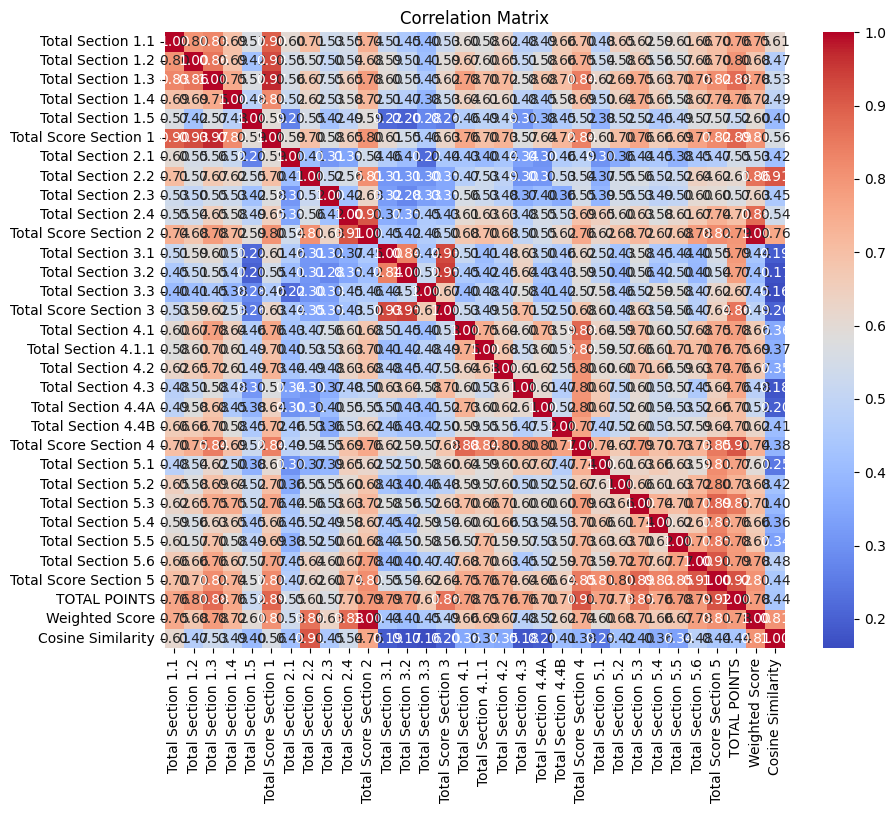

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Visualize the correlation matrix using
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Brand Based Recommendation

In this type of recommendation, we try to recommend a brand based on a brand that the user probably already likes.

In [ ]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix

threshold = df['TOTAL POINTS'].mean()
df['HighPoints'] = (df['TOTAL POINTS'] > threshold).astype(int)

suitability_subsection_scores = df.drop(['Brand Name', 'TOTAL POINTS'], axis=1)

# Apply Truncated SVD to reduce dimensionality
n_components = 10
svd = TruncatedSVD(n_components=n_components)
suitability_subsection_scores_svd = svd.fit_transform(suitability_subsection_scores)

# Concatenate the SVD components with the original features
features_svd = pd.concat([df[['Brand Name', 'TOTAL POINTS', 'HighPoints']], pd.DataFrame(suitability_subsection_scores_svd)], axis=1)

features = features_svd.drop(['Brand Name', 'TOTAL POINTS', 'HighPoints'], axis=1)
features = features.dropna()

# Splitting the data
train_data, test_data = train_test_split(features_svd, test_size=0.2, random_state=42)

# Cosine similarity between items (brands)
item_similarities = cosine_similarity(features)

user_brand = test_data.iloc[0]['Brand Name']
user_brand_index = features_svd[features_svd['Brand Name'] == user_brand].index[0]
similar_brands_indices = item_similarities[user_brand_index].argsort()[::-1][1:]

recommended_brands = features_svd.iloc[similar_brands_indices]['Brand Name'].values

# Evaluation:
actual_labels = test_data['HighPoints'].values
predicted_labels = (test_data['Brand Name'].isin(recommended_brands)).astype(int)

precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
accuracy = accuracy_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)
roc_auc = roc_auc_score(actual_labels, predicted_labels)

conf_matrix = confusion_matrix(actual_labels, predicted_labels)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)

print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.4489795918367347
Recall: 0.9565217391304348
Accuracy: 0.44
F1 Score: 0.6111111111111112
ROC AUC Score: 0.4782608695652174
Confusion Matrix:
[[ 0 27]
 [ 1 22]]
Precision: 0.4489795918367347
Recall: 0.9565217391304348


This shows us a precision recall trade-off. Our model has a high Recall, meaning it's good at identifying relevant brands, but this comes at the cost of many false positives (low Precision). However rec

In [ ]:
def get_recommendations(brand_name, num_recommendations=5):
    brand_index = df[df['Brand Name'] == brand_name].index[0]
    similar_brands_indices = item_similarities[brand_index].argsort()[::-1][1:num_recommendations+1]
    recommended_brands = df.iloc[similar_brands_indices]['Brand Name'].values
    return recommended_brands

brand_to_recommend_for = 'H&M'
recommendations = get_recommendations(brand_to_recommend_for)
print(f"Recommended brands for {brand_to_recommend_for}")
print(recommendations)

Recommended brands for H&M
['OVS' 'Gucci' 'C&A' 'Puma' 'United Colors of Benetton']


Feel free to try with a brand name of your choice!